# Implementing a neural network from scratch

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import sklearn.datasets
%matplotlib inline

## Generating a dataset

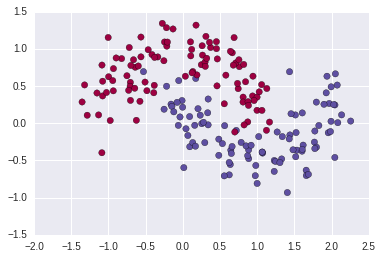

In [3]:
np.random.seed(0)

X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

We just generated a dataset with two classes, plotted as red and blue points. We can think of the red dots as female patients and the blue dots as the male patients. The x- and y- axis can be thought as the medical measurements.

Our goal is to create a model that can predict the correct class, male of female, given the x- and y- coordinates. As we can see, our data is not linearly separable, which means we cannot draw a straight line that separates the two classes.

In [14]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [4]:
num_examples = len(X)
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# Gradient descent parameters 
epsilon = 0.01
reg_lambda = 0.01

In [5]:
def calculate_loss(model):
    """
    evaluate the total loss given a model
    """
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate prediction
    z_1 = X.dot(W1) + b1
    a_1 = np.tanh(z_1)
    z_2 = a_1.dot(W2) + b2
    exp_scores = np.exp(z_2)
    
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    # Calculating the loss
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs)
    
    # Add regularization term
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [6]:
def predict(model, X):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z_1 = X.dot(W1) + b1
    a_1 = np.tanh(z_1)
    z_2 = a_1.dot(W2) + b2
    exp_scores = np.exp(z_2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    return np.argmax(probs, axis=1)

In [11]:
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    """
    nn_hdim: number of nodes in the hidden layer
    num_passes: number of passes through the training data for gradient descent
    
    """
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    
    model = {}
    
    for i in xrange(0, num_passes):
        # Forward propagation
        z_1 = X.dot(W1) + b1
        a_1 = np.tanh(z_1)
        z_2 = a_1.dot(W2) + b2
        exp_scores = np.exp(z_2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        
        # Backward propagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a_1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a_1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0, keepdims=True)
        
        # Add regularization terms
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
        
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        if print_loss and i % 1000 == 0:
            print("Loss after iteration {0}: {1}".format(i, calculate_loss(model)))
            
            
    return model

## A network with a hidden layer of size 3

In [12]:
model = build_model(3, print_loss=True)

Loss after iteration 0: 0.432386631525
Loss after iteration 1000: 0.0689465381198
Loss after iteration 2000: 0.0688883457637
Loss after iteration 3000: 0.070751988863
Loss after iteration 4000: 0.0707483552187
Loss after iteration 5000: 0.0707512109276
Loss after iteration 6000: 0.0707540736415
Loss after iteration 7000: 0.0707560581752
Loss after iteration 8000: 0.070757274274
Loss after iteration 9000: 0.0707579570874
Loss after iteration 10000: 0.0707583005705
Loss after iteration 11000: 0.0707584396165
Loss after iteration 12000: 0.0707584618117
Loss after iteration 13000: 0.0707584217309
Loss after iteration 14000: 0.0707583522354
Loss after iteration 15000: 0.0707582723932
Loss after iteration 16000: 0.0707581927406
Loss after iteration 17000: 0.0707581186657
Loss after iteration 18000: 0.0707580525352
Loss after iteration 19000: 0.0707579950057


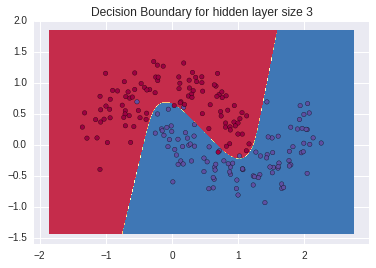

In [15]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

## Varying the hidden layer size

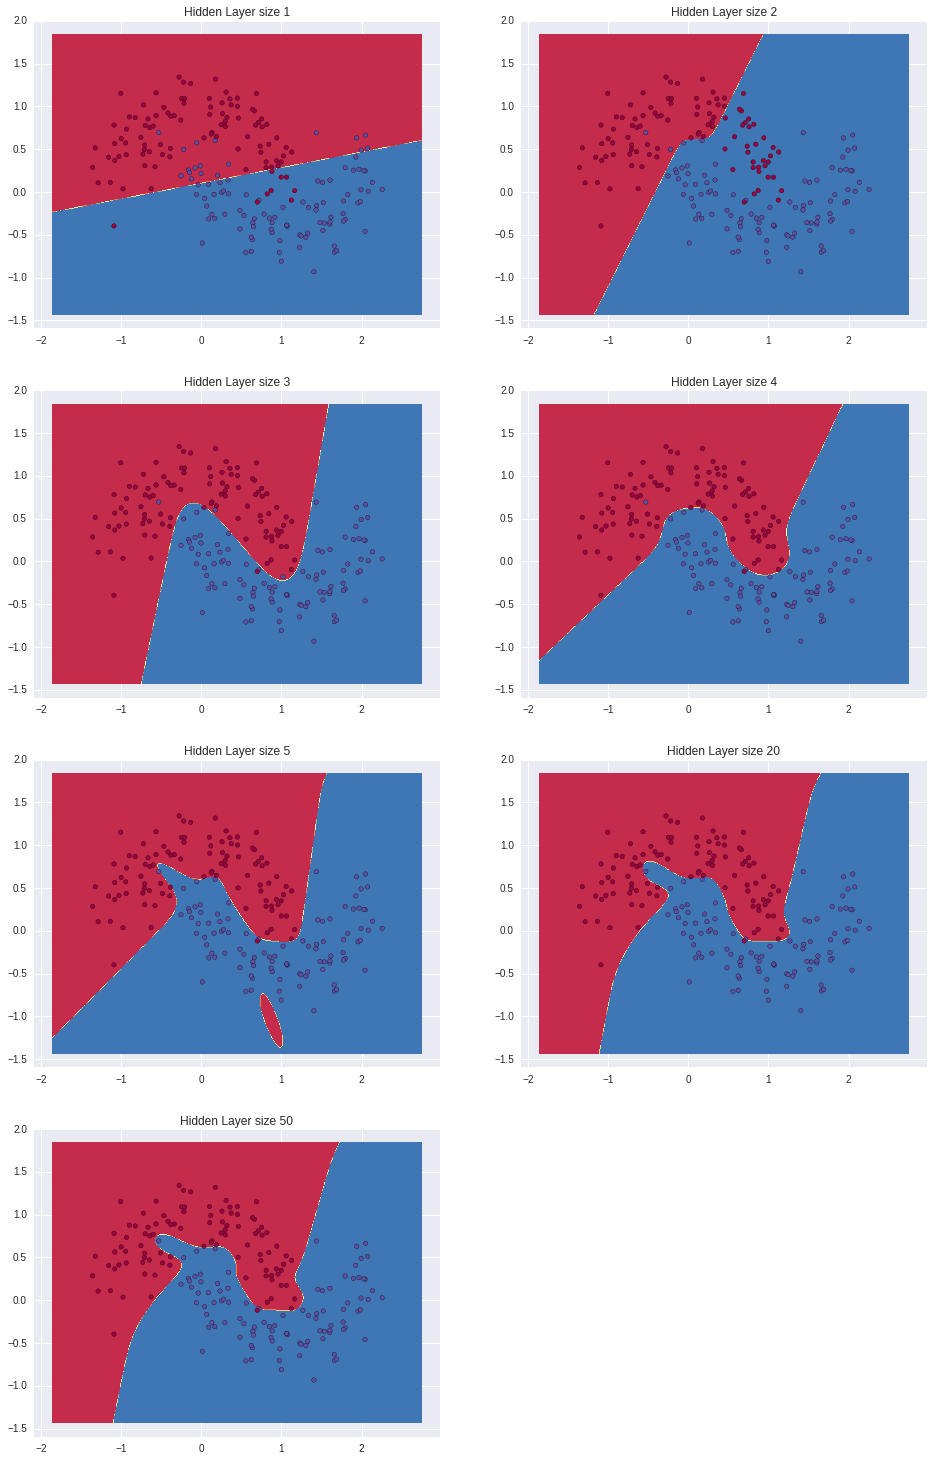

In [16]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()